Extracting features...
19/19 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step
Performing K-means clustering...
Cluster Labels for Test Images:
Image 1: Cluster 0
Image 2: Cluster 0
Image 3: Cluster 0
Image 4: Cluster 0
Image 5: Cluster 0
Image 6: Cluster 0
Image 7: Cluster 0
Image 8: Cluster 0
Image 9: Cluster 0
Image 10: Cluster 0
Image 11: Cluster 0
Image 12: Cluster 0
Image 13: Cluster 0
Image 14: Cluster 1
Image 15: Cluster 0
Image 16: Cluster 0
Image 17: Cluster 0
Image 18: Cluster 0
Image 19: Cluster 0
Image 20: Cluster 0
Image 21: Cluster 0
Image 22: Cluster 0
Image 23: Cluster 0
Image 24: Cluster 0
Image 25: Cluster 1
Image 26: Cluster 0
Image 27: Cluster 0
Image 28: Cluster 0
Image 29: Cluster 0
Image 30: Cluster 0
Image 31: Cluster 0
Image 32: Cluster 0
Image 33: Cluster 0
Image 34: Cluster 1
Image 35: Cluster 0
Image 36: Cluster 0
Image 37: Cluster 0
Image 38: Cluster 0
Image 39: Cluster 0
Image 40: Cluster 0
Image 41: Cluster 0
Image 42: Cluster 1
Imag

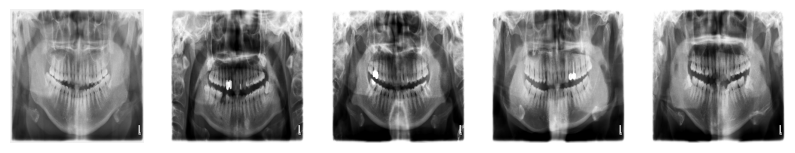

Cluster 1 Images:


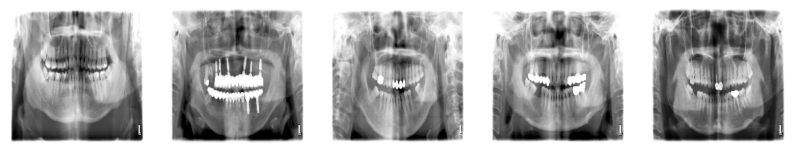

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.applications.resnet import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path, img_size=(224, 224)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img = cv2.imread(os.path.join(folder_path, filename))
            img = cv2.resize(img, img_size)  # Resize to match input size of ResNet/DenseNet
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img)
    return np.array(images)

# Paths to train and test folders
train_folder = "/content/drive/MyDrive/Panoramic radiography database"
test_folder = "/content/drive/MyDrive/Labeled/UNET/images"

# Load the datasets
x_train = load_images_from_folder(train_folder)
x_test = load_images_from_folder(test_folder)

# Select the model: ResNet or DenseNet for feature extraction
def get_feature_extractor(model_name="resnet"):
    if model_name == "resnet":
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        preprocess = preprocess_resnet
    elif model_name == "densenet":
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        preprocess = preprocess_densenet
    else:
        raise ValueError("Model name must be 'resnet' or 'densenet'.")

    model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
    return model, preprocess

# Choose model for feature extraction
feature_extractor, preprocess = get_feature_extractor("resnet")  # Change to 'densenet' if desired

# Preprocess images
x_train_preprocessed = preprocess(x_train)
x_test_preprocessed = preprocess(x_test)

# Extract features from the train and test datasets
print("Extracting features...")
train_features = feature_extractor.predict(x_train_preprocessed)
test_features = feature_extractor.predict(x_test_preprocessed)

# Flatten the features (Reshape from 4D to 2D for clustering)
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Perform K-means clustering on the extracted features
print("Performing K-means clustering...")
kmeans = KMeans(n_clusters=2, random_state=42)  # Assume 2 clusters (Caries vs No Caries)
kmeans.fit(train_features_flat)

# Predict cluster labels for the test images
test_labels = kmeans.predict(test_features_flat)

# Display clustering results
print("Cluster Labels for Test Images:")
for i, label in enumerate(test_labels):
    print(f"Image {i+1}: Cluster {label}")

# Visualize some clustered images
def show_cluster_images(images, labels, cluster_num):
    plt.figure(figsize=(10, 5))
    cluster_images = [images[i] for i in range(len(labels)) if labels[i] == cluster_num]
    for i, img in enumerate(cluster_images[:5]):  # Show 5 images from the cluster
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Show images from both clusters
print("Cluster 0 Images:")
show_cluster_images(x_test, test_labels, 0)
print("Cluster 1 Images:")
show_cluster_images(x_test, test_labels, 1)


Extracting features...
19/19 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step
Performing K-means clustering...
Cluster Labels for Test Images:
Image 1: Cluster 0
Image 2: Cluster 1
Image 3: Cluster 0
Image 4: Cluster 0
Image 5: Cluster 1
Image 6: Cluster 0
Image 7: Cluster 0
Image 8: Cluster 1
Image 9: Cluster 0
Image 10: Cluster 0
Image 11: Cluster 0
Image 12: Cluster 1
Image 13: Cluster 0
Image 14: Cluster 0
Image 15: Cluster 0
Image 16: Cluster 0
Image 17: Cluster 0
Image 18: Cluster 1
Image 19: Cluster 1
Image 20: Cluster 0
Image 21: Cluster 1
Image 22: Cluster 0
Image 23: Cluster 0
Image 24: Cluster 0
Image 25: Cluster 0
Image 26: Cluster 0
Image 27: Cluster 0
Image 28: Cluster 0
Image 29: Cluster 1
Image 30: Cluster 0
Image 31: Cluster 0
Image 32: Cluster 0
Image 33: Cluster 0
Image 34: Cluster 1
Image 35: Cluster 0
Image 36: Cluster 1
Image 37: Cluster 0
Image 38: Cluster 1
Image 39: Cluster 1
Image 40: Cluster 0
Image 41: Cluster 0
Image 42: Cluster 0
I

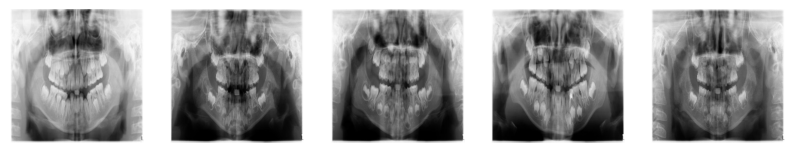

Cluster 1 Images:


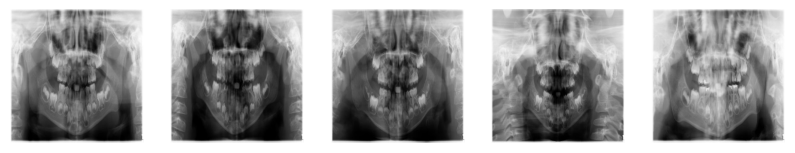

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.applications.resnet import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path, img_size=(224, 224)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img = cv2.imread(os.path.join(folder_path, filename))
            img = cv2.resize(img, img_size)  # Resize to match input size of ResNet/DenseNet
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img)
    return np.array(images)

# Paths to train and test folders
train_folder = "/content/drive/MyDrive/Panoramic radiography database"
test_folder = "/content/drive/MyDrive/Labeled/archive (6)/CHILDREN’S DENTAL PANORAMIC X-RAY DATASET/Dental Disease Detection dataset/images"

# Load the datasets
x_train = load_images_from_folder(train_folder)
x_test = load_images_from_folder(test_folder)

# Select the model: ResNet or DenseNet for feature extraction
def get_feature_extractor(model_name="resnet"):
    if model_name == "resnet":
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        preprocess = preprocess_resnet
    elif model_name == "densenet":
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        preprocess = preprocess_densenet
    else:
        raise ValueError("Model name must be 'resnet' or 'densenet'.")

    model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
    return model, preprocess

# Choose model for feature extraction
feature_extractor, preprocess = get_feature_extractor("resnet")  # Change to 'densenet' if desired

# Preprocess images
x_train_preprocessed = preprocess(x_train)
x_test_preprocessed = preprocess(x_test)

# Extract features from the train and test datasets
print("Extracting features...")
train_features = feature_extractor.predict(x_train_preprocessed)
test_features = feature_extractor.predict(x_test_preprocessed)

# Flatten the features (Reshape from 4D to 2D for clustering)
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Perform K-means clustering on the extracted features
print("Performing K-means clustering...")
kmeans = KMeans(n_clusters=2, random_state=42)  # Assume 2 clusters (Caries vs No Caries)
kmeans.fit(train_features_flat)

# Predict cluster labels for the test images
test_labels = kmeans.predict(test_features_flat)

# Display clustering results
print("Cluster Labels for Test Images:")
for i, label in enumerate(test_labels):
    print(f"Image {i+1}: Cluster {label}")

# Visualize some clustered images
def show_cluster_images(images, labels, cluster_num):
    plt.figure(figsize=(10, 5))
    cluster_images = [images[i] for i in range(len(labels)) if labels[i] == cluster_num]
    for i, img in enumerate(cluster_images[:5]):  # Show 5 images from the cluster
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Show images from both clusters
print("Cluster 0 Images:")
show_cluster_images(x_test, test_labels, 0)
print("Cluster 1 Images:")
show_cluster_images(x_test, test_labels, 1)
